## Generate Salpha plot, 
### We construct the time frequency map after whitening by a O3a data

In [10]:
from __future__ import division
import sys
sys.path.append("o3inspiralhom/scripts/")

import lal
import lalsimulation as lalsim
import pycbc.frame
from pycbc.psd import welch, interpolate
from pycbc.filter import highpass_fir, resample_to_delta_t, sigmasq

import os, sys
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15

from calndm import FindNonDimensionalFrequency
import utils
mUtils = utils.MiscellaneousUtils()

### Generate a HoM waveform of a nonspinning system and save in a file

In [2]:





def h(m1,m2,iota,mode_list):
    mUtils = utils.MiscellaneousUtils()
    mUtils.approx =  'SEOBNRv4HM' #'IMRPhenomHM' #  'SEOBNRv4HM'
    mUtils.deltaT = 1.0/4096.0
    mUtils.fmax = 0.5/mUtils.deltaT
    mUtils.deltaF = 1.0/5.0

    mUtils.fmin = 50.0

    mUtils.tref = 4.0
    mUtils.det = "L1"
    
    mUtils.mass1 = m1
    mUtils.mass2 = m2
    mUtils.iota = iota
    mUtils.mode_list=mode_list #[(l,m),(2,2)]

    wf0 = mUtils._gen_waveform()
    return wf0



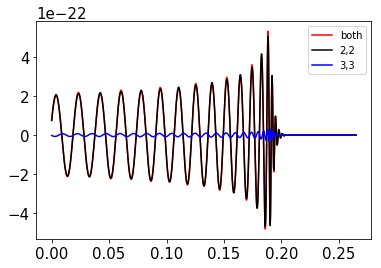

In [3]:
# length of the waveform should be less than mUtils.tref 
# otherwise crop the waveform
m1=36
m2=6
iota=-3
mode_list=[(3,3),(2,2)]
plt.plot(np.arange(h(m1,m2,iota,mode_list).data.length)*h(m1,m2,iota,mode_list).deltaT, h(m1,m2,iota,mode_list).data.data,c='r',label='both')
mode_list=[(2,2)]
plt.plot(np.arange(h(m1,m2,iota,mode_list).data.length)*h(m1,m2,iota,mode_list).deltaT, h(m1,m2,iota,mode_list).data.data,c='k',label='2,2')

mode_list=[(3,3)]
plt.plot(np.arange(h(m1,m2,iota,mode_list).data.length)*h(m1,m2,iota,mode_list).deltaT, h(m1,m2,iota,mode_list).data.data,c='b',label='3,3')

#plt.yscale('log')
plt.legend()
#h22=wf0.data.data
#h33=wf0.data.data

In [5]:
n=2000
m1m2i_min=[1,1,0.1]
m1m2i_max=[100,100,3.14]
data = np.random.uniform(low=m1m2i_min, high=m1m2i_max, size=(n,3))



32.61475891657264 77.05421367090155 0.9078067755613131
0.20190275209394581


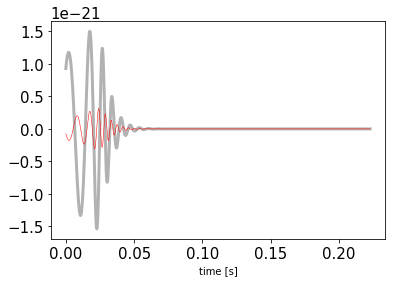

62.77333768743468 96.81826667543436 2.9266530752308593
0.02961586083034845


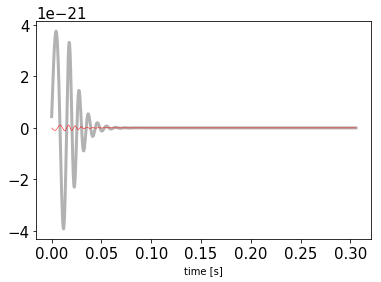

84.09860684226311 63.1150874742424 1.8007639950655756
0.09126070741126258


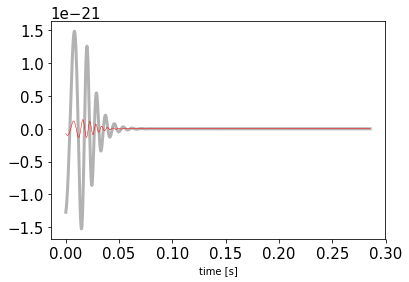

89.13247596699556 36.176962090858574 1.1952418884179135
0.2494041403329461


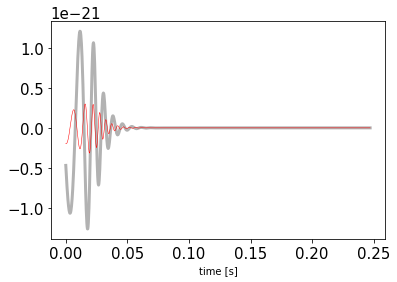

98.11094691871263 7.07508933657565 1.1263865139640665
0.45874948140772087


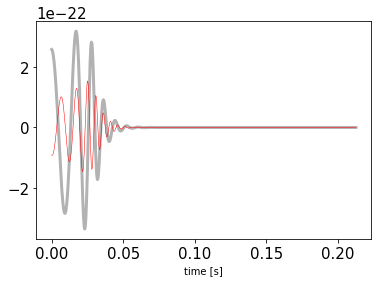

14.860018733498706 10.667547596605738 0.9556915225110184
0.08593920647036613


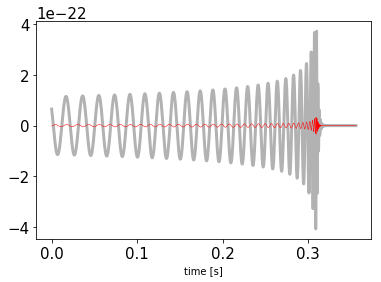

82.70477261289146 12.15578199512586 1.732434302486892
0.43778095200413936


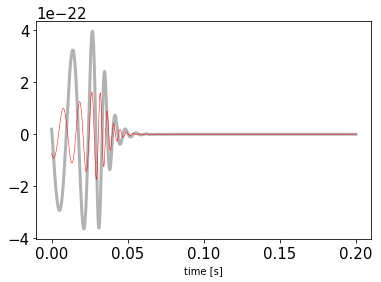

63.727059055947606 1.0395166239287295 1.9139920377718713
0.5230151443664833


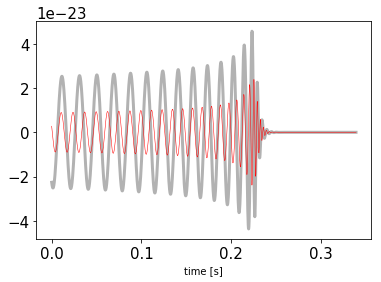

6.167710016095152 33.71874513272963 1.6803540520832483
0.4208102173595071


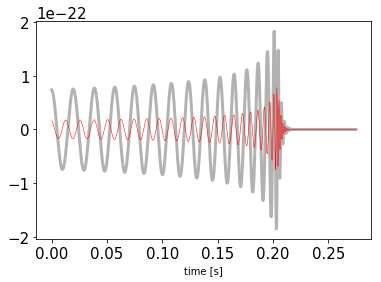

3.713117000128594 90.82159640050735 2.1625625398833224
0.44071620040470627


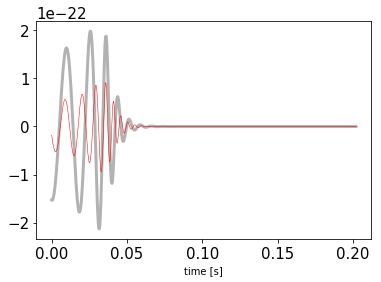

In [6]:
for d in data[21:31]:
    m1=d[0];m2=d[1];iota=d[2]
    print m1,m2,iota
    plt.plot(np.arange(h(m1,m2,iota,[(2,2)]).data.length)*h(m1,m2,iota,[(2,2)]).deltaT, h(m1,m2,iota,[(2,2)]).data.data,'k',alpha=0.3,lw=3,label='2,2')
    plt.plot(np.arange(h(m1,m2,iota,[(3,3)]).data.length)*h(m1,m2,iota,[(3,3)]).deltaT, h(m1,m2,iota,[(3,3)]).data.data,'r',alpha=1.0,lw=0.5,label='3,3')
    print abs(h(m1,m2,iota,[(3,3)]).data.data).max()/abs(h(m1,m2,iota,[(2,2)]).data.data).max()
    #plt.yscale("log")
    #plt.xlim([4,4.3])
    plt.xlabel("time [s]")
    plt.savefig("higermodes.pdf",dpi=150)
    plt.show()

In [7]:
import time
t0 = time.time()
mode_ratio=[]

print 'for m1,m2,iota; the ratio of peak ampllitude in 33 mode divided by 22 mode'

for d in data[5:11]:
    m1=d[0];m2=d[1];iota=d[2]
    print  d, abs(h(m1,m2,iota,[(3,3)]).data.data).max()/abs(h(m1,m2,iota,[(2,2)]).data.data).max()
    mode_ratio.append([d,abs(h(m1,m2,iota,[(3,3)]).data.data).max()/abs(h(m1,m2,iota,[(2,2)]).data.data).max()])
    
    

np.save('mode_ratio_dist.npy',mode_ratio)

print(time.time()-t0)


for m1,m2,iota; the ratio of peak ampllitude in 33 mode divided by 22 mode
[ 5.81472644 47.54755355  2.73870203] 0.17984183715794355
[26.20532752 41.42228372  0.72822485] 0.09623810320018422
[85.47273961 68.79025696  1.85371886] 0.06873860724301623
[12.5950055  57.95248641  0.78489121] 0.2798977258931772
[42.07174317 18.92086608  1.94870811] 0.21921130997309687
[46.65422381 78.52382774  1.54903347] 0.16523124647561832
31.106347084


In [9]:
#np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
ds=np.load('mode_ratio_dist.npy',allow_pickle=False)
print ds

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [4]:
np.save( 'waveform.npy', wf0.data.data )

### Load the data and generate the $Y(\alpha)$ plot

In [5]:
import glob
import re
import sys
sys.path.append("o3inspiralhom/scripts/")

36.0 9.0
110649
4.7998046875


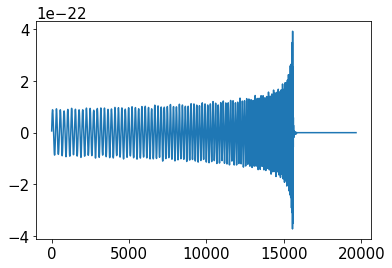

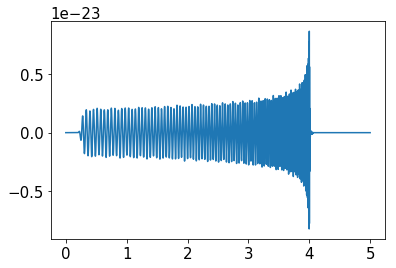

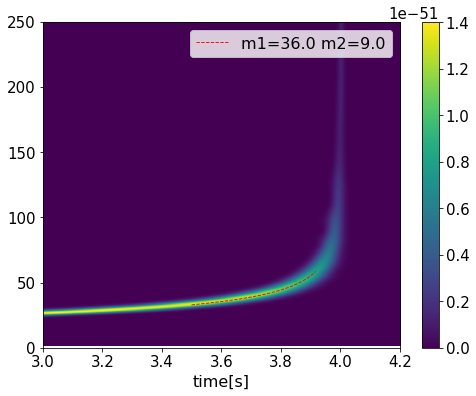

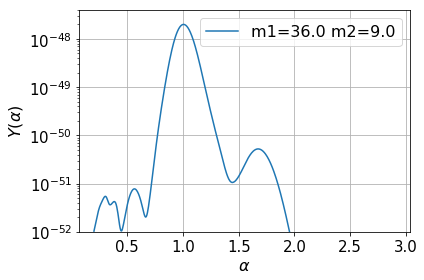

35.0 5.0
49205
4.7998046875


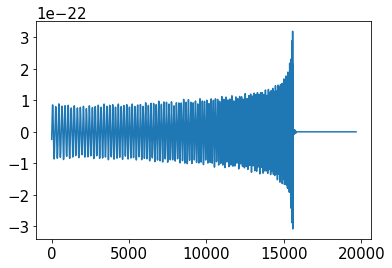

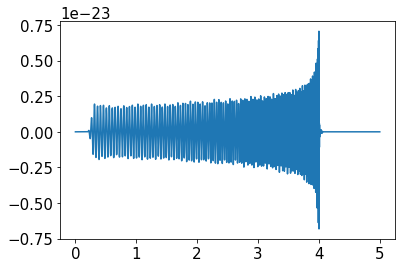

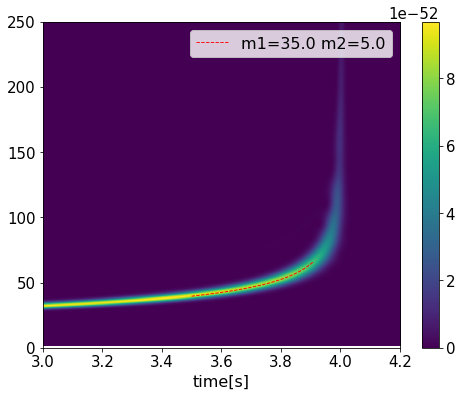

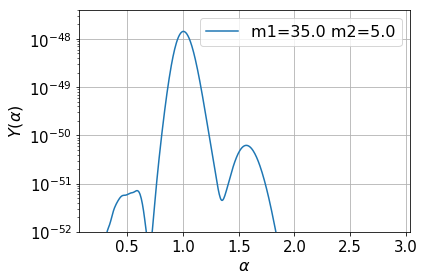

50.0 10.0
36924
4.7998046875


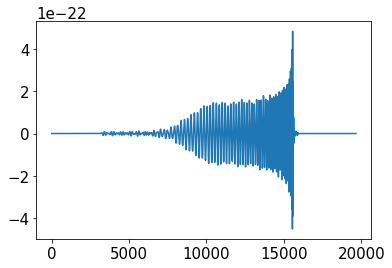

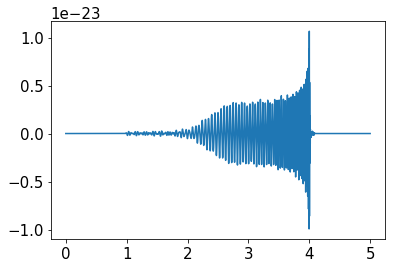

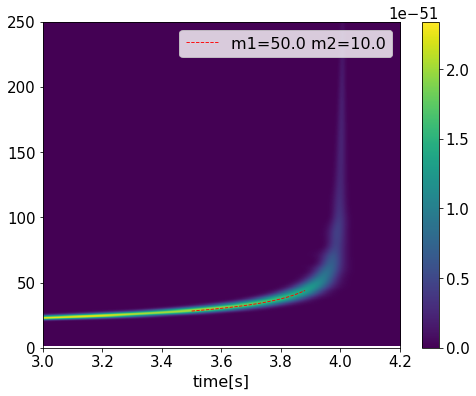

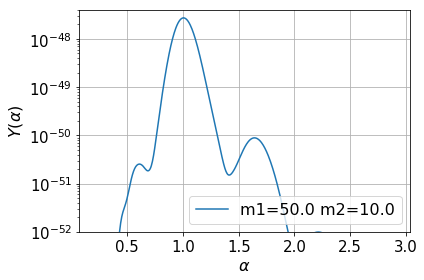

70.0 10.0
32828
4.7998046875


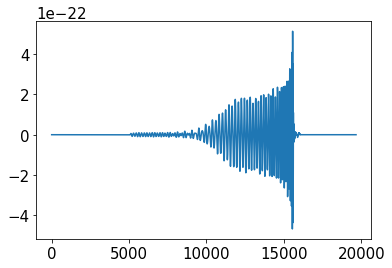

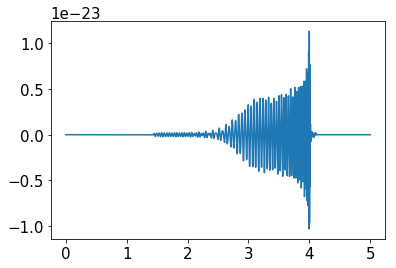

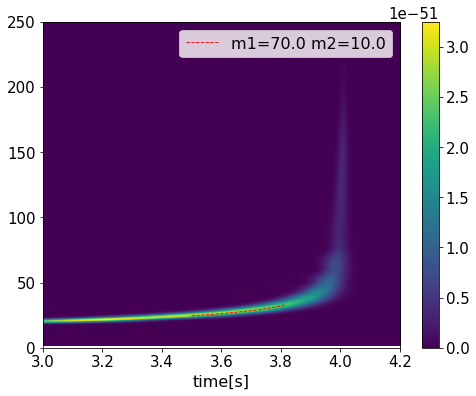

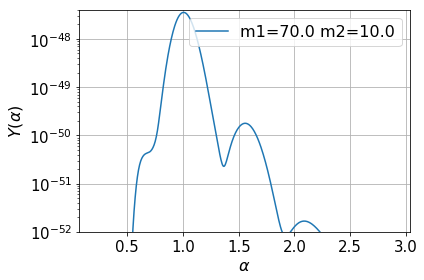

28.0 7.0
45117
4.7998046875


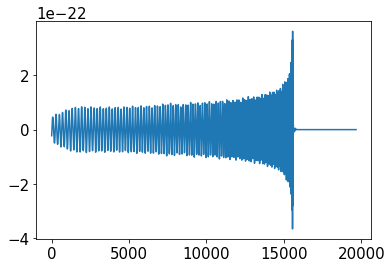

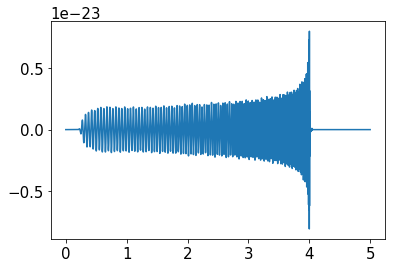

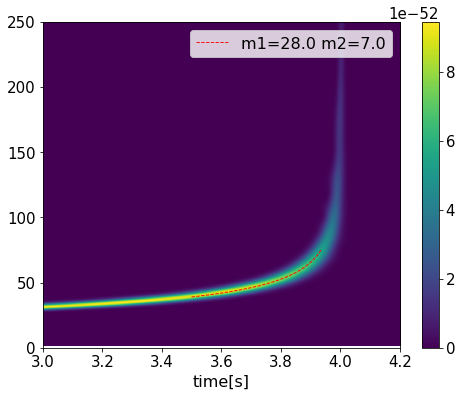

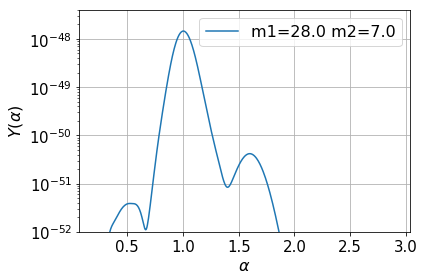

42.0 8.0
41014
4.7998046875


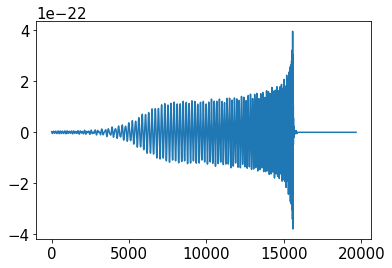

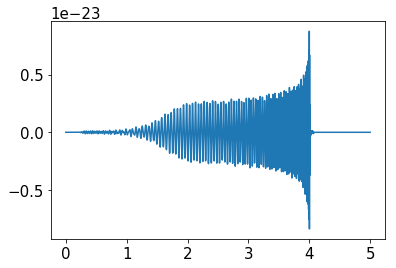

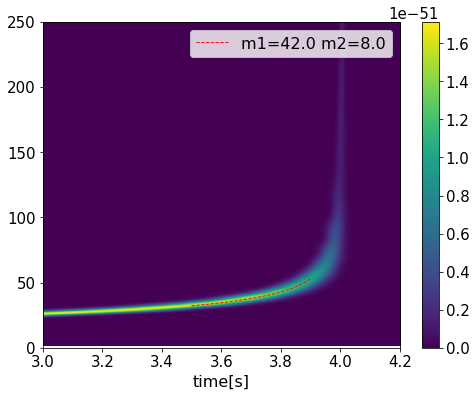

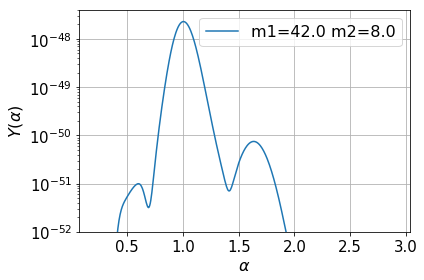

45.0 15.0
32833
4.7998046875


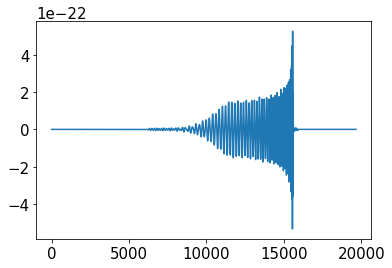

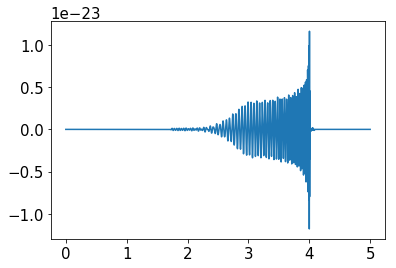

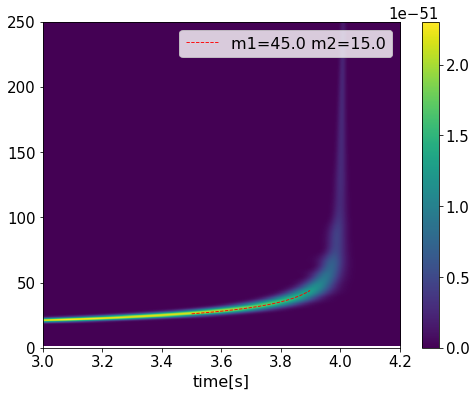

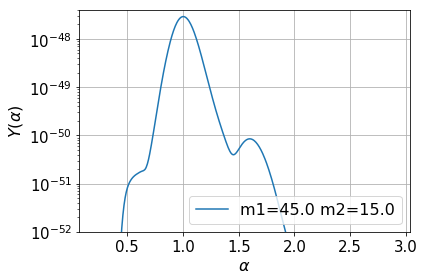

70.0 20.0
28743
4.7998046875


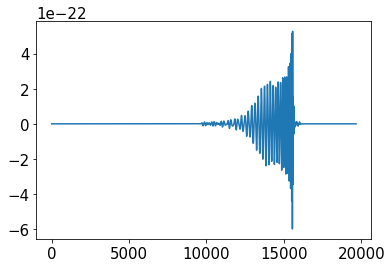

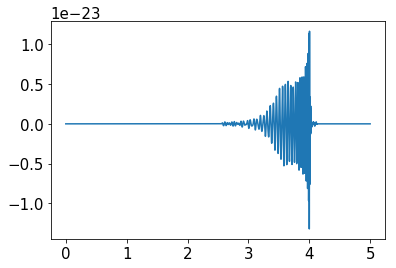

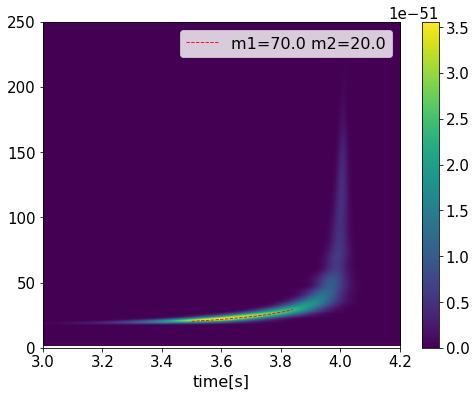

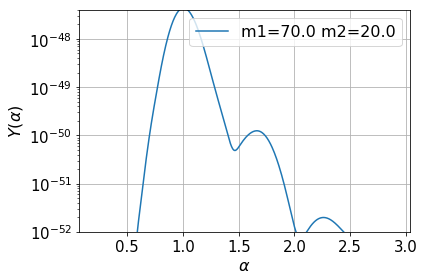

20.0 10.0
45115
4.7998046875


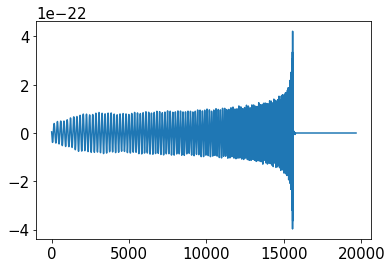

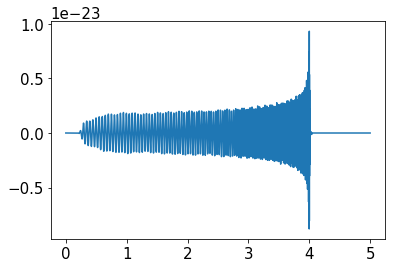

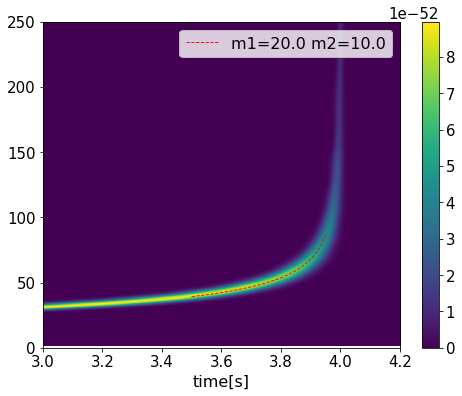

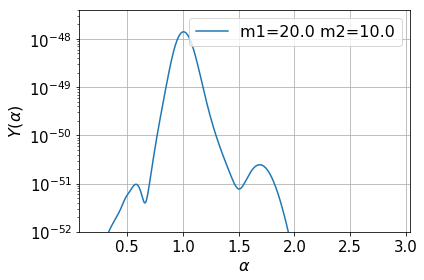

36.0 12.0
36919
4.7998046875


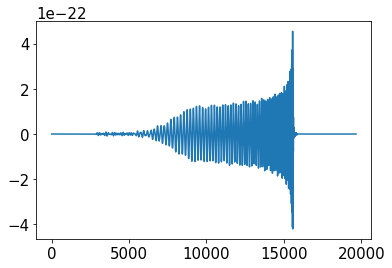

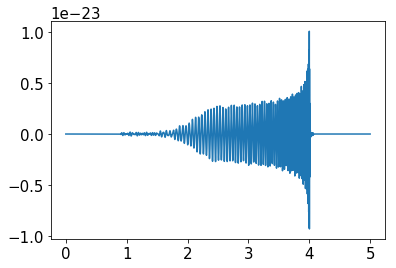

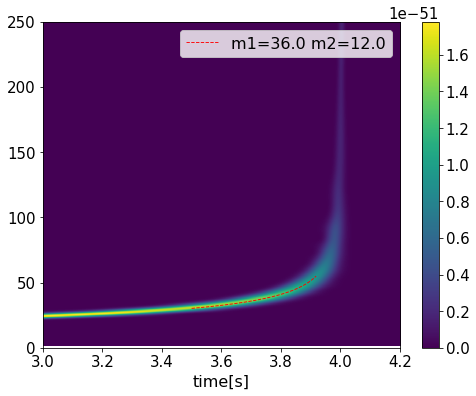

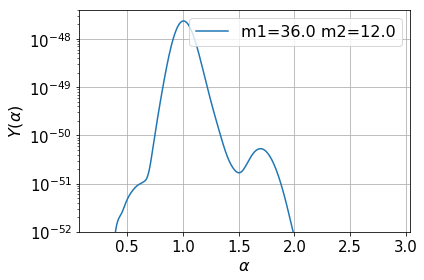

In [43]:
from pycbc import frame
import scipy.fftpack 
frame_path="/home/rahul.kashyap/o3_highermodes/injection_o3HMinsp/HOM_noiseless_inj/"

info_list=glob.glob(frame_path+'inj*/INFO')
#print info_list
H1_list=glob.glob(frame_path+'inj*/*H1.txt')
#print H1_list


for filename,H1_data in zip(info_list,H1_list):#[0:1]:
    inj = filename.split('/')[6]
    f=open(filename)
    lines=f.readlines()
    #print lines[1]
    m1 = float(lines[1].split('=')[1].split('\n')[0])
    m2 = float(lines[2].split('=')[1].split('\n')[0])
    print m1,m2
    #print(re.findall('\d*?\.\d+', lines[1]))
    wf1=np.loadtxt(H1_data)
    #plt.plot(data)
    #plt.show()


    indx = np.where(wf1==np.max(wf1))[0][0]
    print(indx)
    wf1=wf1[indx-int(3.8*4096):indx+1*4096]  # 3.8 s before and 1 s after merger i.e. peak
    print(len(wf1)/4096)
    plt.plot(wf1)
    plt.show()

    ## Set the parameters of the waveform
    #mUtils.approx = 'SEOBNRv4HM'
    mUtils.deltaT = 1.0/4096.0
    mUtils.fmax = 0.5/mUtils.deltaT
    mUtils.deltaF = 1.0/5.0   #should not be too small i.e. smaller data segment 

    mUtils.fmin = 15.0  #LIGO starting band

    mUtils.tref = 4.0  # this should be the merger time; peak of say 2,2 mode 
    #mUtils.det = "L1"
    mUtils.mass1 = m1
    mUtils.mass2 = m2
    #mUtils.iota = 0.9

    
    wf = pycbc.types.TimeSeries( wf1, delta_t=mUtils.deltaT )

    # Multiply by Tukey window to taper at the start point.
    wf.data *= mUtils._gen_tukey_window(len(wf), beta=0.05, start=True, end=False)

    length = int(1.0/mUtils.deltaT/mUtils.deltaF)
    wf.resize( length )


    # Set the peak index at mUtils.tref
    peak_indx = wf.abs_arg_max()
    col_indx = int( mUtils.tref/mUtils.deltaT)
    shift_indx = col_indx-peak_indx
    wf.roll(shift_indx)
    
    
    plt.plot(wf.sample_times, wf.data)
    plt.clf()
    psd=pycbc.types.FrequencySeries(np.ones(len(wf.data)//2+1),mUtils.deltaF)  #no noise 
    whiten_wf = mUtils._whiten(wf, psd)
    plt.plot( whiten_wf.sample_times, whiten_wf.data)
    plt.show()
    
    ### Generate the time Frequency map
    mUtils.cwt_fhigh= 600.0
    mUtils.alpha_arr = np.linspace(0.2, 2.9, 541)
    mUtils.ndm_freq = 15.0
    mUtils.wavelet_Cg = 30.0
    cmplx_cwt, scales, freqs, coi, fftfreqs = mUtils._compute_cwt(whiten_wf,norm=True)

    # Take absolute square
    wf_power = np.abs(cmplx_cwt)**2.0


    ### Generate the time-frequency track of the (2, 2) mode
    # set a waverom, not necessary to be a HM waveform
    mUtils.approx = 'IMRPhenomD'
    fSchwarzISCO = 1.0 / ( 6.0**1.5 * lal.PI * (mUtils.mass1 + mUtils.mass2) * lal.MTSUN_SI )
    mUtils.track_end_frequency = 0.6*fSchwarzISCO
    mUtils.track_max_length = 0.5


    tArrFixDT, fArrFixDT, interpF, interpT = \
               mUtils._gen_time_frequency_path(start_freq=mUtils.fmin)
    
    
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow( wf_power , extent=[0.0, 1.0/mUtils.deltaF, freqs.min(), freqs.max()],\
                aspect='auto', origin='lower')
    ax.plot(tArrFixDT, fArrFixDT, ls='--', c='r', lw=0.9,label='m1=%s m2=%s'%(m1,m2))
    #ax.plot(tArrFixDT, 1.5*fArrFixDT, ls='--', c='white', lw=0.5)
    ax.set_ylim(0.0, 250)
    ax.set_xlim(3.0, 4.2)
    plt.xlabel('time[s]',fontsize=16)
    fig.colorbar(im)
    plt.legend(fontsize=16)
    plt.savefig(frame_path+'/S_alpha_noiseless_figures/%s_t-freq.pdf'%inj,dpi=100)
    plt.show()

    plt.clf()
    ## Generate S(\alpha) from TF map
    Salpha = mUtils._stack_pixels_energies(wf_power, tArrFixDT, fArrFixDT, interpT)
    plt.semilogy(mUtils.alpha_arr, Salpha,label='m1=%s m2=%s'%(m1,m2))
    #plt.xlim([1,2])
    plt.ylim([1.e-52,4.e-48])
    plt.xlabel(r'$\alpha$',fontsize=16)
    plt.ylabel(r'$Y(\alpha)$',fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=16)
    plt.tight_layout()
    plt.savefig(frame_path+'/S_alpha_noiseless_figures/%s_Salpha.pdf'%inj,dpi=100)
    plt.show()


# Soumen's calculations

110649
4.7998046875


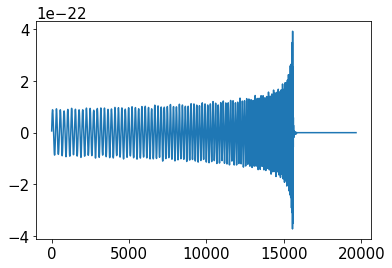

In [20]:

## Set the parameters of the waveform
mUtils.approx = 'SEOBNRv4HM'
mUtils.deltaT = 1.0/4096.0
mUtils.fmax = 0.5/mUtils.deltaT
mUtils.deltaF = 1.0/5.0

mUtils.fmin = 15.0

mUtils.tref = 4.0
mUtils.det = "L1"
mUtils.mass1 = 36.662310665079644
mUtils.mass2 = 10.475005235539586
mUtils.iota = 0.9

#wf1 = np.load( 'waveform.npy' )
frame_path="/home/rahul.kashyap/o3_highermodes/injection_o3HMinsp/HOM_inj/inj0/"

wf1 = np.loadtxt(frame_path+'hwinjcbc_1249852230_H1.txt')
indx = np.where(wf1==np.max(wf1))[0][0]
print(indx)
wf1=wf1[indx-int(3.8*4096):indx+1*4096]  # 3.8 s before and 1 s after merger i.e. peak
print(len(wf1)/4096)
plt.plot(wf1)
plt.show()

## Set the parameters of the waveform
#mUtils.approx = 'SEOBNRv4HM'
mUtils.deltaT = 1.0/4096.0
mUtils.fmax = 0.5/mUtils.deltaT
mUtils.deltaF = 1.0/5.0   #should not be too small i.e. smaller data segment 

mUtils.fmin = 15.0  #LIGO starting band

mUtils.tref = 4.0  # this should be the merger time; peak of say 2,2 mode 
#mUtils.det = "L1"
mUtils.mass1 = 36.0
mUtils.mass2 = 9.0
#mUtils.iota = 0.9


In [21]:
## Resize the waveform and set the coalescence time at mUtils.tref

## One can use a frame file, use: pybc.frame.read
## wf = pycbc.frame.read_frame('waveform.gwf', 'G1:DER_DATA_H')

wf = pycbc.types.TimeSeries( wf1, delta_t=mUtils.deltaT )

# Multiply by Tukey window to taper at the start point.
wf.data *= mUtils._gen_tukey_window(len(wf), beta=0.05, start=True, end=False)

length = int(1.0/mUtils.deltaT/mUtils.deltaF)
wf.resize( length )


# Set the peak index at mUtils.tref
peak_indx = wf.abs_arg_max()
col_indx = int( mUtils.tref/mUtils.deltaT)
shift_indx = col_indx-peak_indx
wf.roll(shift_indx)

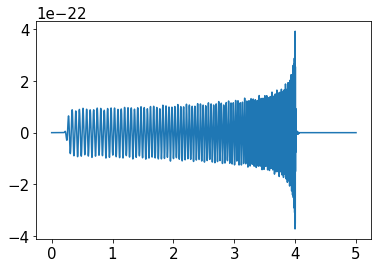

In [22]:
plt.plot(wf.sample_times, wf.data)

In [24]:
### Whiten the waveform using O3 psd

## 64 sec after the GW190412 event
mUtils.event_time = 1239082262.18 + 64.0
mUtils.det_event_time = 1239082262.18 + 64.0

# Loading the gravitational wave starin
half_length = 32
#raw_strain = pycbc.frame.query_and_read_frame("L1_HOFT_C00", "L1:GDS-CALIB_STRAIN", \
#        int(mUtils.det_event_time - half_length), int(mUtils.det_event_time + half_length))
#L1 = resample_to_delta_t(raw_strain, mUtils.deltaT)

# Compute PSD
psd = interpolate(welch(L1), mUtils.deltaF)

NameError: name 'L1' is not defined

In [27]:
psd=pycbc.types.FrequencySeries(np.ones(len(wf.data)//2+1),mUtils.deltaF)  #no noise 
whiten_wf = mUtils._whiten(wf, psd)

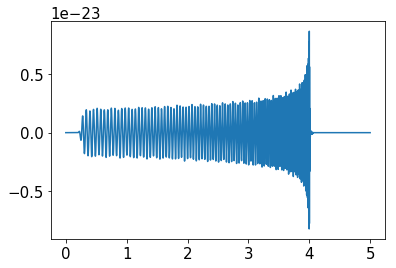

In [26]:
plt.plot( whiten_wf.sample_times, whiten_wf.data)

In [7]:
### Generate the time Frequency map
mUtils.cwt_fhigh= 600.0
mUtils.alpha_arr = np.linspace(0.2, 2.9, 541)
mUtils.ndm_freq = 15.0
mUtils.wavelet_Cg = 30.0
cmplx_cwt, scales, freqs, coi, fftfreqs = mUtils._compute_cwt(whiten_wf,norm=True)

# Take absolute square
wf_power = np.abs(cmplx_cwt)**2.0


In [8]:
### Generate the time-frequency track of the (2, 2) mode
# set a waverom, not necessary to be a HM waveform
mUtils.approx = 'IMRPhenomD'
fSchwarzISCO = 1.0 / ( 6.0**1.5 * lal.PI * (mUtils.mass1 + mUtils.mass2) * lal.MTSUN_SI )
mUtils.track_end_frequency = 0.6*fSchwarzISCO
mUtils.track_max_length = 0.5


tArrFixDT, fArrFixDT, interpF, interpT = \
           mUtils._gen_time_frequency_path(start_freq=mUtils.fmin)


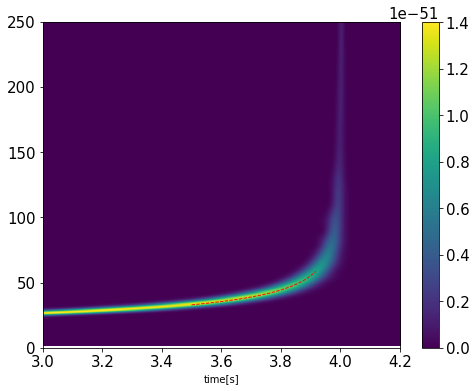

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow( wf_power , extent=[0.0, 1.0/mUtils.deltaF, freqs.min(), freqs.max()],\
            aspect='auto', origin='lower')
ax.plot(tArrFixDT, fArrFixDT, ls='--', c='r', lw=0.9)
#ax.plot(tArrFixDT, 1.5*fArrFixDT, ls='--', c='white', lw=0.5)
ax.set_ylim(0.0, 250)
ax.set_xlim(3.0, 4.2)
plt.xlabel('time[s]')
fig.colorbar(im)

In [10]:
## Generate S(\alpha) from TF map
Salpha = mUtils._stack_pixels_energies(wf_power, tArrFixDT, fArrFixDT, interpT)

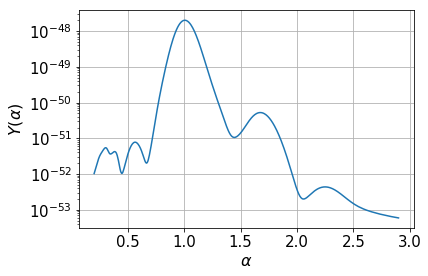

In [16]:
plt.semilogy(mUtils.alpha_arr, Salpha)
#plt.xlim([1,2])
#plt.ylim([0,1.e-50])
plt.xlabel(r'$\alpha$',fontsize=16)
plt.ylabel(r'$Y(\alpha)$',fontsize=16)
plt.grid(True)